In [70]:
import numpy as np
import matplotlib.pyplot as plt
from time import time
from scipy.io import wavfile
import math
from scipy.fftpack import fft,ifft,dct,idct

In [71]:
#functions for transform and inverse transform

def dft_and_dct_transform(transform_type,x):
    N=len(x)
    if transform_type==0:
        gtm=fft(x)
    if transform_type==1:
        gtm=dct(x,norm='ortho')
    return gtm   

def idft_and_idct_transform(transform_type,X):
    N=len(X)
    if transform_type==0:
        igtm=ifft(X)
    if transform_type==1:
        igtm=idct(X,norm='ortho')
    return igtm

#reading the .wav audio file
def audio_file_input():
    fs, data = wavfile.read('cow_voice_audio.wav')
    data = data[ :44100]
    return data


def dot_product(x,y,N):
    err=x-y
    errt=np.transpose(err)
    errt=np.conjugate(errt)
    
    return errt*err/N

def RMDFT(X,L,N):
    for i in range(int((N+1-L)/2),int((N-1+L)/2)+1,1):
        X[i]=0
    return X    

def  RmDCT(X,L,N):
    for i in range(N-L,N):
        X[i]=0
    return X   



def MSE(transform_type,x,X,N):
    error=[]
    fraction=100
    for l in range(0,N,fraction):
        if transform_type==0:
            Xm=RMDFT(X,l,N)
            xm=idft_and_idct_transform(0,Xm)
        if transform_type==1:
            Xm=RmDCT(X,l,N)
            xm=idft_and_idct_transform(1,Xm)
        y=xm-x
        error=np.append(error,np.dot(y,np.conjugate(y))/N)
    return error

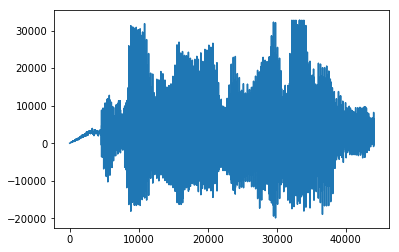

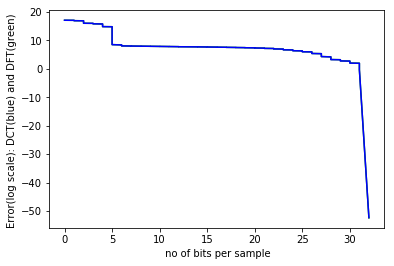

In [72]:
#Main program

input_data = audio_file_input()
plt.plot(input_data,label="input audio")
plt.show()

N = input_data.shape[0]
bits = 32
color=['g', 'b']

for i in range(0,2,1):
    transformOfInputData = dft_and_dct_transform(i,input_data)
    err  = MSE(i,input_data,transformOfInputData,N)
    err  = np.log(err) # Log error
    x  = np.arange(0,N,100)
    x  = 32*(N-x)/N
    plt.plot(x,err,color[i])
    plt.xlabel(" no of bits per sample")
    plt.ylabel("Error(log scale): DCT(blue) and DFT(green) ")

plt.show()
